In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import tensorflow as tf
import sklearn as sk
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
df = pd.read_excel('Final_clean_data.xlsx')
display(df)

,ETL_C60,ETL_C60 | BCP,ETL_PAA | PCBM-60 | BCP,ETL_PCBM-60,ETL_PCBM-60 | BCP,ETL_SnO2-c,ETL_SnO2-np,ETL_TiO2-c,ETL_TiO2-c | PCBM-60,ETL_TiO2-c | TiO2-mp,...,PSK_additives_Undoped,PSK_additives_nan,NIP,PIN,scan_speed,PCE,Voc,Jsc,FF,Hysteresis_index
0,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,125.0,0.00042,0.010,0.700,0.060,1.000000
1,0,0,0,0,0,0,0,0,0,1,...,0,1,1,0,50.0,0.03010,0.542,0.165,0.336,0.239203
2,0,0,0,0,0,0,0,0,0,1,...,0,1,1,0,20.0,0.06000,0.870,0.380,0.180,0.166667
3,0,0,0,0,0,0,0,0,0,1,...,0,1,1,0,20.0,0.07000,0.880,0.480,0.170,0.142857
4,0,0,0,0,0,0,0,0,0,1,...,0,1,1,0,20.0,0.09000,0.890,0.620,0.160,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1210,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,20.0,20.83000,1.138,23.670,0.770,0.017763
1211,0,0,1,0,0,0,0,0,0,0,...,1,0,0,1,40.0,21.09000,1.088,23.997,0.807,0.020863
1212,0,0,1,0,0,0,0,0,0,0,...,1,0,0,1,40.0,21.02000,1.074,24.317,0.805,0.009515
1213,0,0,0,0,0,1,0,0,0,0,...,0,1,1,0,10.0,21.54000,1.186,23.250,0.782,0.030641


In [17]:
#df['Combined MAPbI3'] = df['PSK_MAPbI']+df['PSK_MAPbI3']
#df.drop(['PSK_MAPbI', 'PSK_MAPbI3'], axis=1, inplace=True)
#df.rename(columns={'Combined MAPbI3': 'PSK_MAPBI3'}, inplace=True)
#display(df)

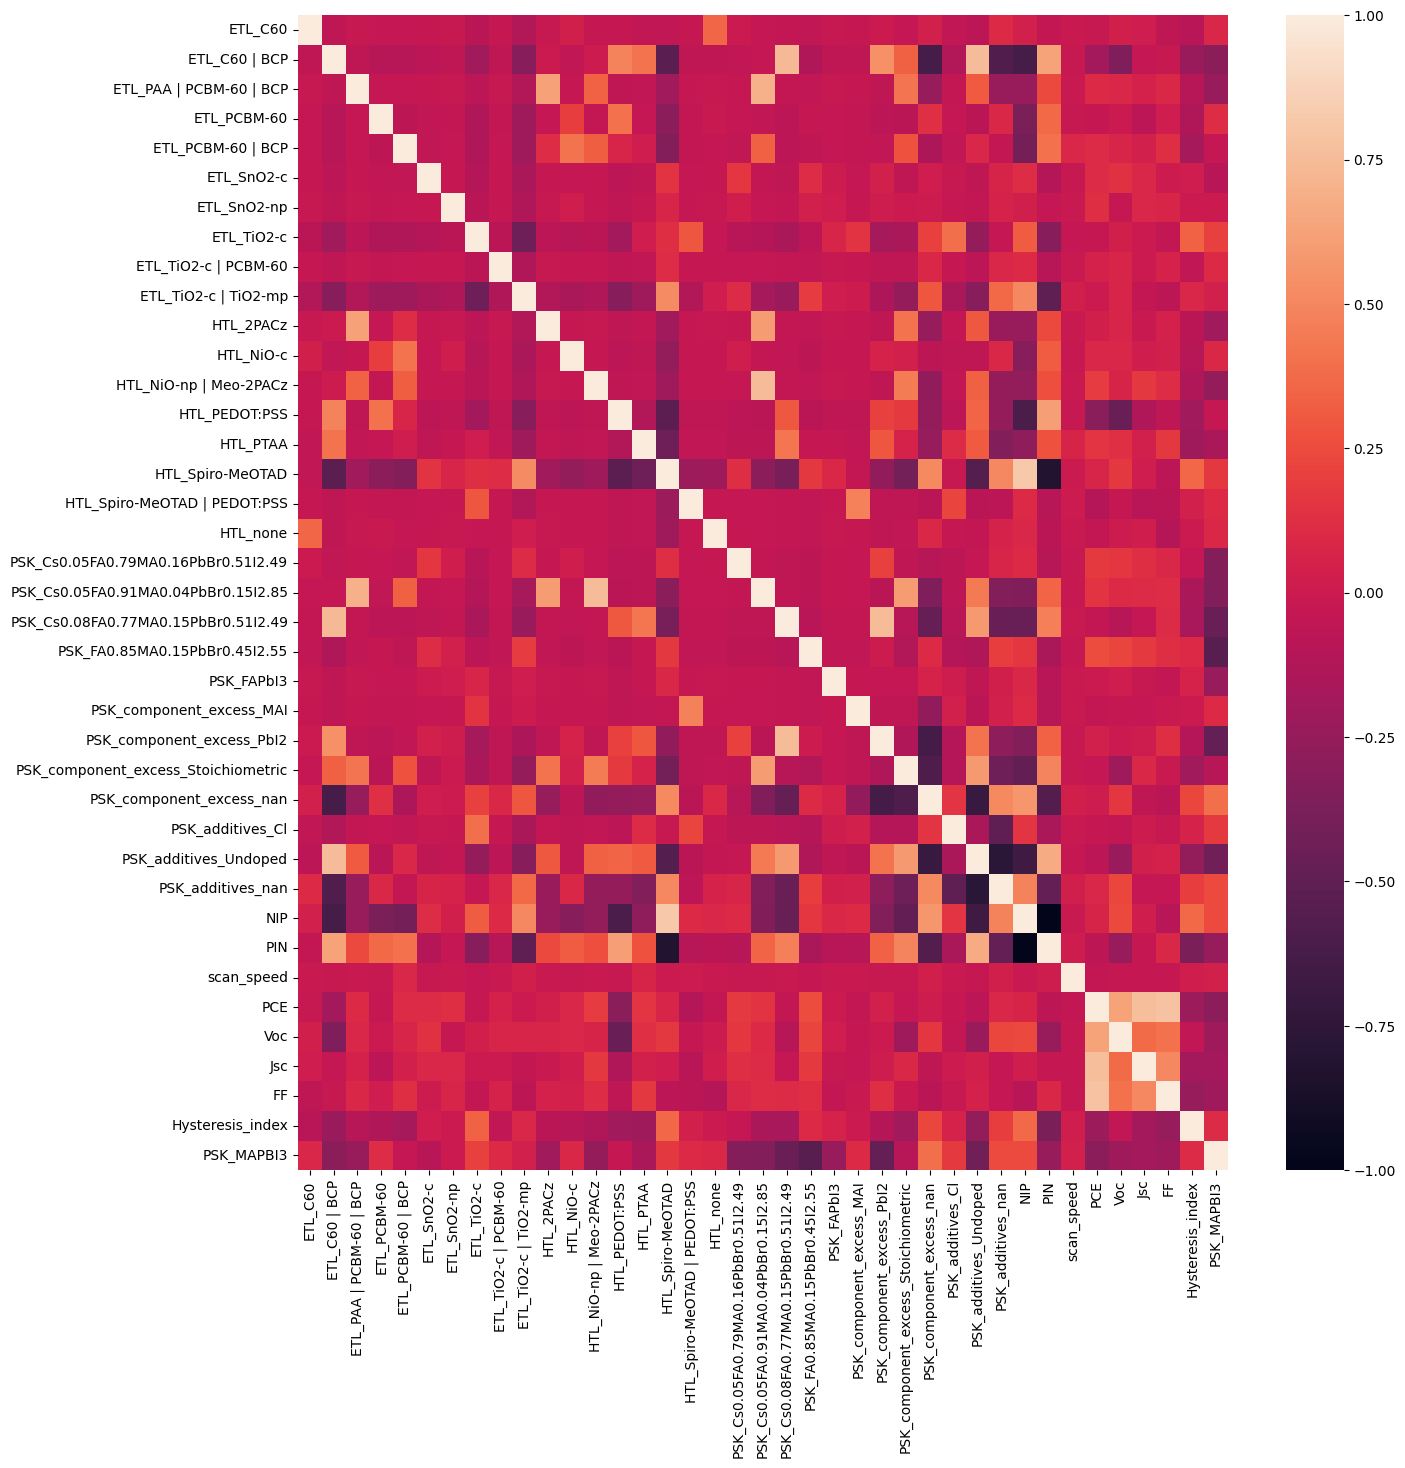

In [40]:
cor = df.corr()['Hysteresis_index']
cormatrix = df.corr()
fig, ax = plt.subplots(figsize=(15,15))
sn.heatmap(cormatrix)
plt.show()
Cor = pd.DataFrame(cor)

In [53]:
X,y = df.drop('Hysteresis_index', axis=1), df['Hysteresis_index']

from sklearn.model_selection import train_test_split
# Split the data into training and temporary sets
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

# Split the temporary set into validation and test sets
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=43)

In [54]:
'''#Optimisation of RF model through Gird Search
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
# Define the parameter grid
param_grid = {
    'n_estimators': [20,30,40,50],  # Number of trees in the forest
    'max_depth': [30,40,50,60],  # Maximum depth of the tree
    'min_samples_split': [30,40,50,60],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [2,3,4],  # Minimum number of samples required to be at a leaf node
    'bootstrap': [True]  # Method of selecting samples for training each tree
}
# Create a base model
rfm = RandomForestRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rfm, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X, y)

# Get the best parameters
best_params = grid_search.best_params_
print(best_params)'''

"#Optimisation of RF model through Gird Search\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn.ensemble import RandomForestRegressor\n# Define the parameter grid\nparam_grid = {\n    'n_estimators': [20,30,40,50],  # Number of trees in the forest\n    'max_depth': [30,40,50,60],  # Maximum depth of the tree\n    'min_samples_split': [30,40,50,60],  # Minimum number of samples required to split an internal node\n    'min_samples_leaf': [2,3,4],  # Minimum number of samples required to be at a leaf node\n    'bootstrap': [True]  # Method of selecting samples for training each tree\n}\n# Create a base model\nrfm = RandomForestRegressor()\n\n# Instantiate the grid search model\ngrid_search = GridSearchCV(estimator=rfm, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)\n\n# Fit the grid search to the data\ngrid_search.fit(X, y)\n\n# Get the best parameters\nbest_params = grid_search.best_params_\nprint(best_params)"

In [55]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(bootstrap =True, max_depth = 40, min_samples_leaf = 3, min_samples_split = 30, n_estimators = 40)
rf.fit(X_train,y_train)
print(rf.score(X_train,y_train))

y_pred_train = rf.predict(X_train)
print(sqrt(mean_squared_error(y_pred_train,y_train)))

0.5402785758201987
0.10844404899251456


In [56]:
print(rf.score(X,y))
print(sqrt(mean_squared_error(y_fullpred,y)))

0.4980770637537518
0.10973487612828403


In [57]:
print(rf.score(X_test,y_test))
print(sqrt(mean_squared_error(y_pred,y_test)))

0.36509670271355366
0.10761470251050333


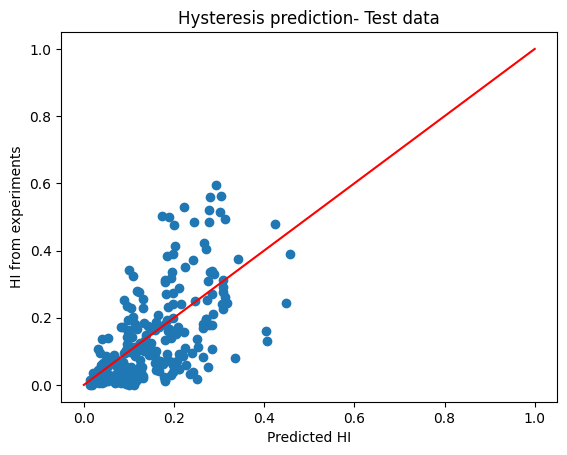

In [69]:
y_pred = rf.predict(X_test)
plt.scatter(y_pred,y_test)
lim1,lim2 = 0,1
xlim,ylim = [lim1,lim2], [lim1,lim2]
#plt.xlim(lim1,lim2)
#plt.ylim(lim1,lim2)
plt.plot(xlim,ylim, color = 'r')
plt.title('Hysteresis prediction- Test data')
plt.xlabel('Predicted HI')
plt.ylabel('HI from experiments')
plt.show()

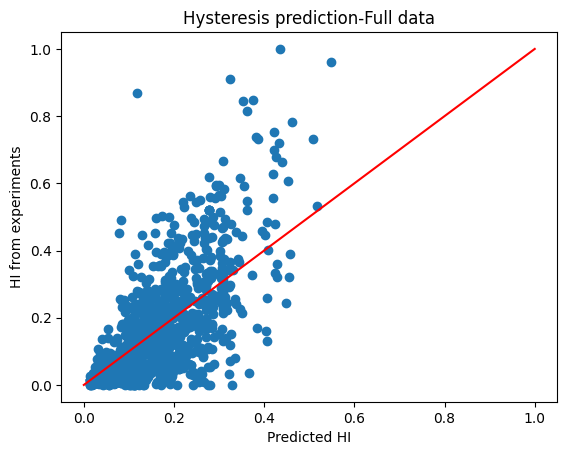

In [67]:
y_fullpred = rf.predict(X)
#y_fullpredictionDataframe = pd.DataFrame(y_fullpred)
#y_fullpredictionDataframe.to_clipboard()
plt.scatter(y_fullpred,y)
lim1,lim2 = 0,1
xlim,ylim = [lim1,lim2], [lim1,lim2]
#plt.xlim(lim1,lim2)
#plt.ylim(lim1,lim2)
plt.plot(xlim,ylim, color = 'r')
plt.title('Hysteresis prediction-Full data')
plt.xlabel('Predicted HI')
plt.ylabel('HI from experiments')
plt.show()

In [ ]:
#Saving the trained random forest model 

Plotting HI vs various parameters

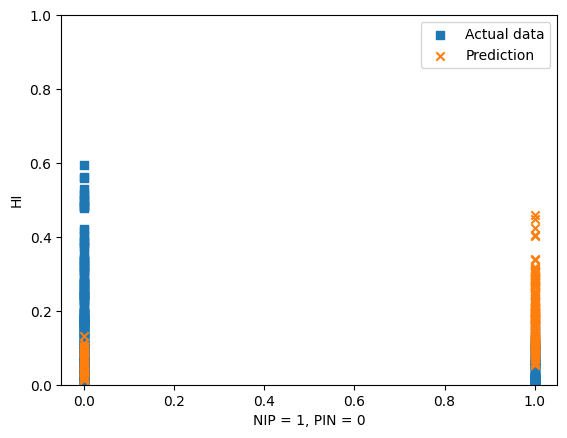

In [60]:
plt.scatter(X_test['PIN'],y_test, label = 'Actual data', marker= 's')
plt.scatter(X_test['NIP'],y_pred, label = 'Prediction', marker='x')
plt.ylim(0,1)
plt.legend()
plt.xlabel('NIP = 1, PIN = 0')
plt.ylabel('HI')
plt.show()

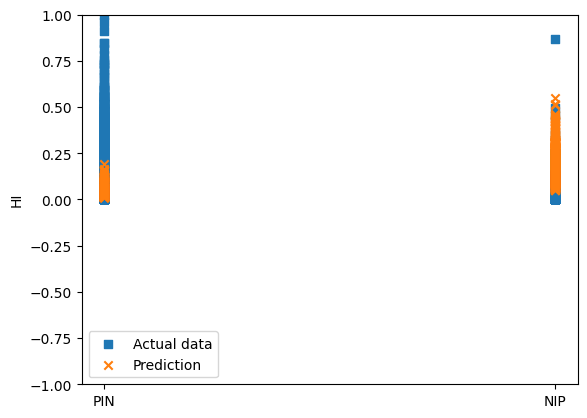

In [61]:

# Assuming 'labels' contains the labels for 0 and 1
labels = ['PIN', 'NIP']

# Your existing code for scatter plot
plt.scatter(X['PIN'], y, label='Actual data', marker='s')
plt.scatter(X['NIP'], y_fullpred, label='Prediction', marker='x')

# Set y-axis limits
plt.ylim(-1, 1)

# Set x-axis tick labels
plt.xticks([0, 1], labels)

# Add labels, legend, and show plot
plt.legend()
plt.ylabel('HI')
plt.show()

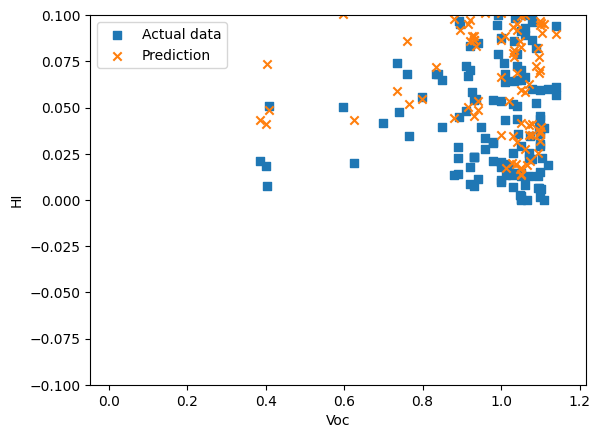

In [62]:
plt.scatter(X_test['Voc'],y_test, label = 'Actual data', marker= 's')
plt.scatter(X_test['Voc'],y_pred, label = 'Prediction', marker='x')
plt.ylim(-0.1,0.1)
plt.xlabel('Voc')
plt.ylabel('HI')
plt.legend()
plt.show()

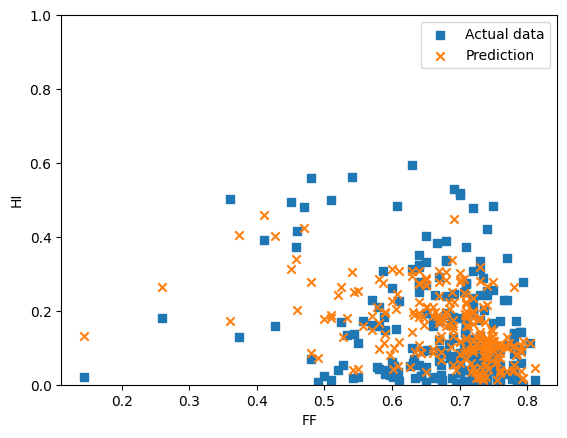

In [63]:
plt.scatter(X_test['FF'],y_test, label ='Actual data', marker='s')
plt.scatter(X_test['FF'], y_pred, label='Prediction', marker='x')
plt.ylim(0,1)
plt.xlabel('FF')
plt.ylabel('HI')
plt.legend()
plt.show()

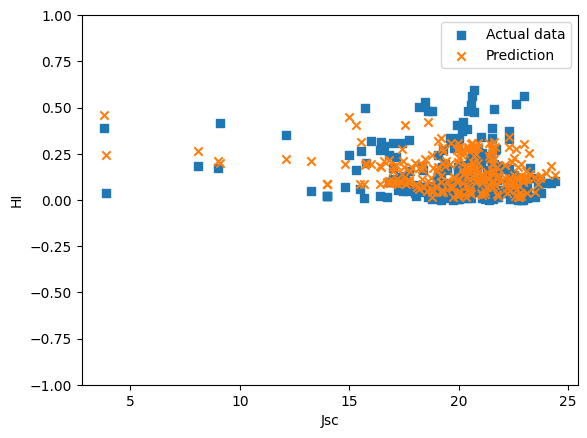

In [64]:
plt.scatter(X_test['Jsc'],y_test, label ='Actual data', marker='s')
plt.scatter(X_test['Jsc'], y_pred, label='Prediction', marker='x')
plt.ylim(-1,1)
plt.xlabel('Jsc')
plt.ylabel('HI')
plt.legend()
plt.show()